# 🍇 군집화

## 📥 라이브러리 준비

> 적절한 커널을 선택한 뒤에 실행하세요. 

In [46]:
! python -m pip install -U pip
! pip install pandas scikit-learn matplotlib seaborn

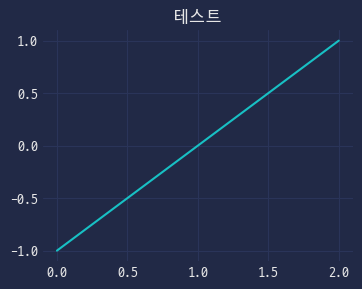

In [47]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

pd.Series([-1,0,1]).plot(figsize=(4,3), title='테스트')
plt.show()

## 📦 데이터 준비
* 테스트 데이터 생성
    * make_blobs()

In [48]:
# 3개의 군집을 가지는 테스트 데이터 생성
from sklearn.datasets import make_blobs
features, targets = make_blobs(n_samples=200, 
                    n_features=2,
                    centers=3,
                    cluster_std=3.5,
                    random_state=42)

print(features.shape, targets.shape)

(200, 2) (200,)


In [49]:
# 생성된 테스트데이터로 DataFrame 만들기
cluster_df = pd.DataFrame(features, columns=['feature1','feature2'])
cluster_df['target'] = targets
cluster_df.head(3)

,feature1,feature2,target
0,11.170090,3.631585,1
1,-11.678305,11.890945,0
2,-6.922491,-10.020500,2


In [50]:
# target 데이터의 빈도수
cluster_df['target'].value_counts()

target
1    67
0    67
2    66
Name: count, dtype: int64

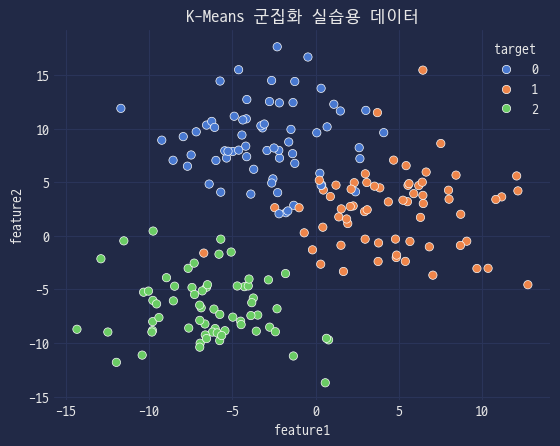

In [51]:
# 데이터 시각화
sns.scatterplot(data=cluster_df, x='feature1', y='feature2', hue='target', palette='muted')
plt.title('K-Means 군집화 실습용 데이터')
plt.show()

## 📏 K-Means 군집화

,feature1,feature2,target,kmeans_cluster
0,11.170090,3.631585,1,0
1,-11.678305,11.890945,0,2
2,-6.922491,-10.020500,2,1
3,-11.947922,-11.806233,2,1
4,-8.942404,-3.906502,2,1
5,-4.264100,-4.743814,2,1
6,-3.182461,10.069702,0,2


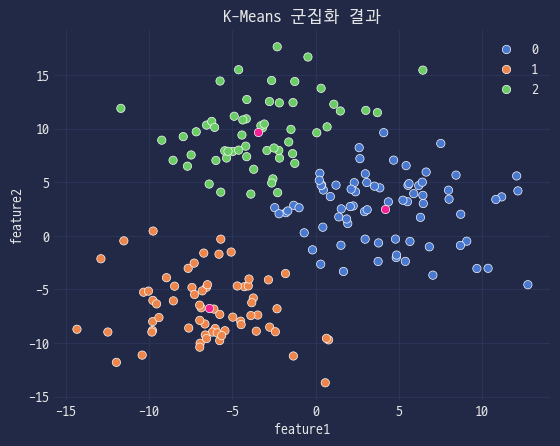

In [52]:
from sklearn.cluster import KMeans

# 클러스터링 객체 생성
km = KMeans(n_clusters=3, random_state=42)
# km = KMeans(random_state=42)

# 학습 및 클러스터링 결과 예측
kmeans_cluster = km.fit_predict(features)

# 데이터프레임에 군집과 결과인 kmeans_cluster 컬럼 추가
cluster_df['kmeans_cluster'] = kmeans_cluster
display(cluster_df.head(7))

# 군집 중심점
# km.cluster_centers_

# 군집화 결과 시각화
sns.scatterplot(data=cluster_df, x='feature1', y='feature2', hue='kmeans_cluster', markers='o', palette='muted')
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1])
plt.title('K-Means 군집화 결과')

plt.show()

### 🦾 Elbow 기법

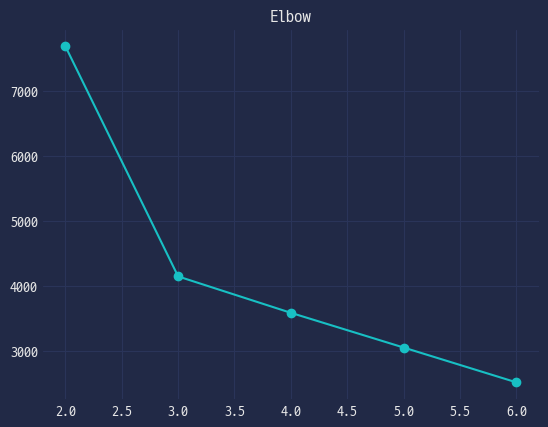

In [63]:
# inertia_: 각 데이터 포인트와 그 데이터가 속한 군집의 중심점 사이의 거리 제곱합 
inertias = []
for i in range(2, 7):
    km = KMeans(i)
    km.fit(features)
    inertias.append(km.inertia_)

# sns.lineplot(x=list(range(2, 7)), y=inertias)
plt.plot(range(2, 7), inertias, marker='o')
plt.title('Elbow')
plt.show()

### 〽️ 실루엣 분석

In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

# 평균 실루엣 계수
print(f'평균 실루엣 계수: {silhouette_score(features, kmeans_cluster)}')

# 개별 실루엣 계수 (군집 평가 지표)
cluster_df['silhouette'] = silhouette_samples(features, kmeans_cluster)
display(cluster_df.head())

# 다른 군집에 클러스터가 할당된 데이터가 있는지 확인
display(cluster_df[cluster_df['silhouette'] < 0])

평균 실루엣 계수: 0.5126687663693518


,feature1,feature2,target,kmeans_cluster,silhouette
0,11.170090,3.631585,1,0,0.502204
1,-11.678305,11.890945,0,2,0.499978
2,-6.922491,-10.020500,2,1,0.713660
3,-11.947922,-11.806233,2,1,0.619380
4,-8.942404,-3.906502,2,1,0.649438


,feature1,feature2,target,kmeans_cluster,silhouette


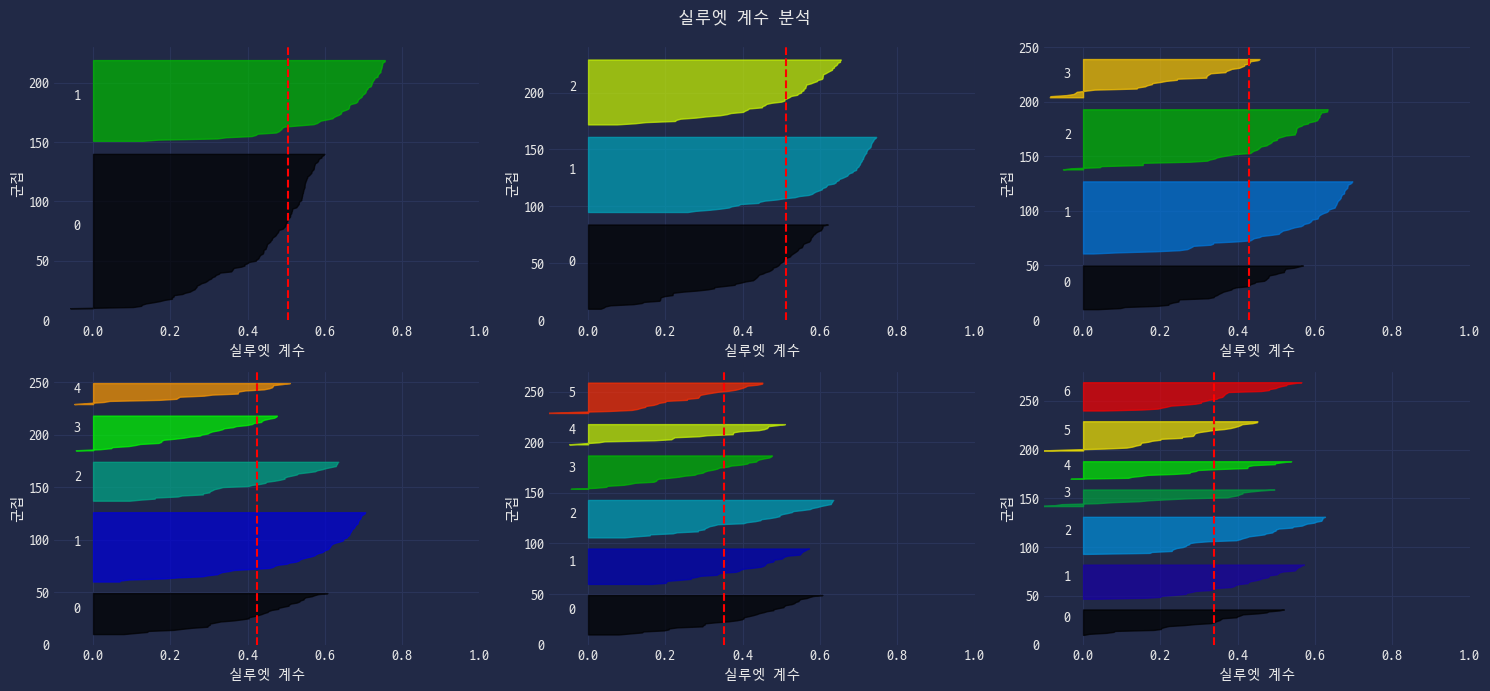

In [55]:
# 최적의 실루엣 찾기
from silhouette_analysis import silhouette_plot

fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 7)
for k in range(2, 8):
    silhouette_plot(features, k, ax[(k - 2) // 3][(k - 2) % 3])

fig.suptitle('실루엣 계수 분석')
fig.tight_layout()
plt.show()

## 🧿 DBSCAN

### 📦 데이터 준비

,feature1,feature2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1


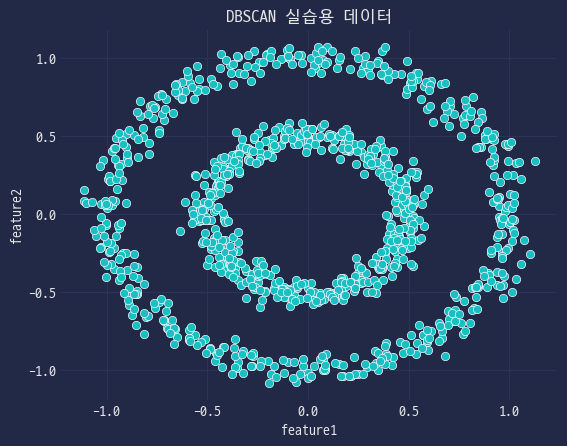

In [56]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    shuffle=True,
                    noise=0.05,
                    random_state=0,
                    factor=0.5)

df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y

display(df.head())

# 시각화
sns.scatterplot(data=df, x='feature1', y='feature2');
plt.title('DBSCAN 실습용 데이터')
plt.show()

### ❓ K-Means 군집화와 비교

#### 📏 K-Means 군집화

,feature1,feature2,target,kmeans
0,0.519781,-0.015981,1,0
1,-0.057719,-0.420279,1,0
2,-0.805155,-0.662227,0,1
3,0.316549,0.312730,1,0
4,-0.304804,0.407563,1,1


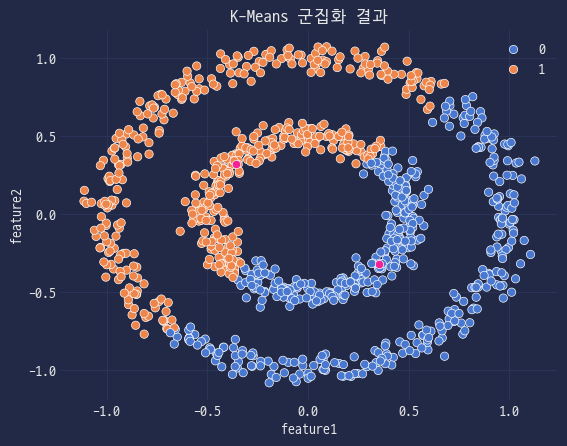

In [57]:
from sklearn.cluster import KMeans

# 클래스로 객체 생성
km = KMeans(n_clusters=2, random_state=0)

# 클러스터링
df['kmeans'] = km.fit_predict(X)
display(df.head())

# 시각화
sns.scatterplot(data=df, x='feature1', y='feature2', hue='kmeans', palette='muted');
sns.scatterplot(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1], marker='o');
plt.title('K-Means 군집화 결과')
plt.show()

#### 🧿 DBSCAN

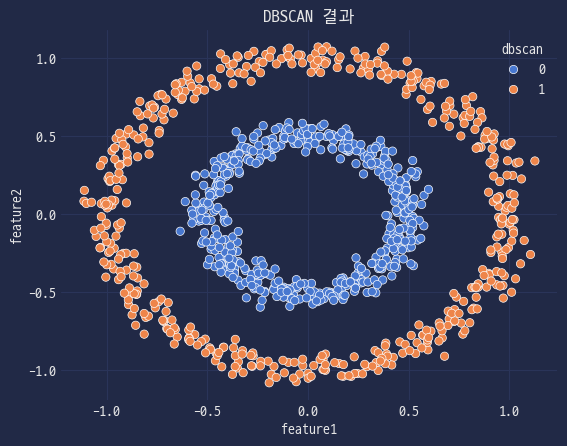

In [65]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10)
df['dbscan'] = dbscan.fit_predict(X)
df.head()

# 시각화
sns.scatterplot(data=df, x='feature1', y='feature2', hue='dbscan', palette='muted');
plt.title('DBSCAN 결과')
plt.show()